/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


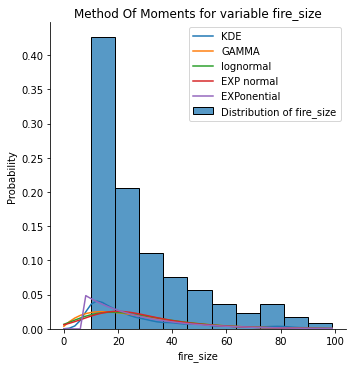

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9979596578277236, pvalue=6.111957208366115e-135), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.569780618309746, pvalue=4.69734695585089e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9780782061032234, pvalue=2.2122515644714596e-83), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=15.602785573904328, pvalue=3.7214610282276794e-09)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9697533170296742, pvalue=2.1623087758157374e-76), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=15.207260152347713, pvalue=2.4334247950008603e-09)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


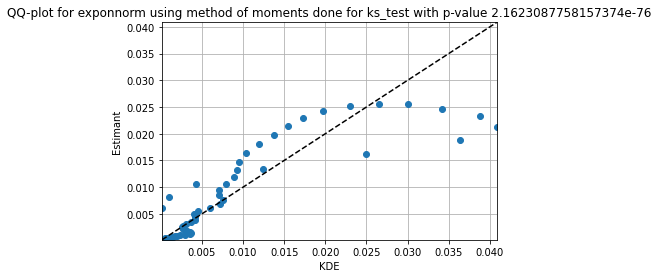

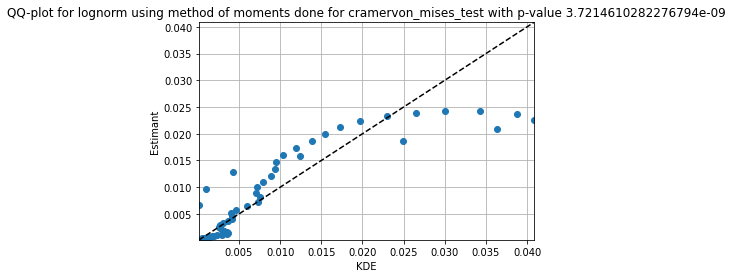

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 
from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

fire_size_classes = pd.unique(df['fire_size_class'])
property = 'fire_size'
s_c = 'C'

dfo = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]

def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'discovery_month'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    return df_clean

df = preprocess_missing_weather_data(dfo)

df_sampled = df.loc[df['fire_size_class'] == s_c]

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()
x = np.linspace(0, max_amount, num=50)
kde_values = kernel(x)

draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 10)

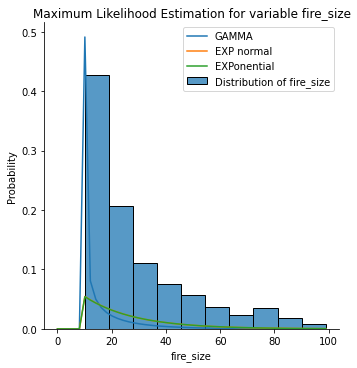

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


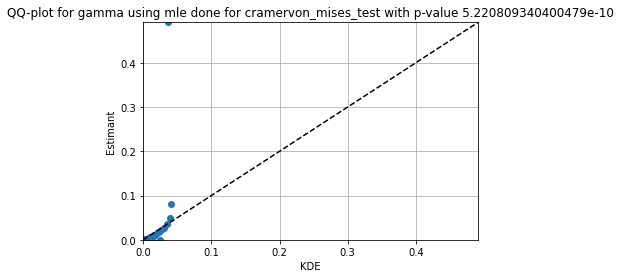

In [9]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 10)

[6.59637746e-06 2.82133534e+01 2.04712845e+01]
[ 6.06122458 19.86508396 20.41292927]


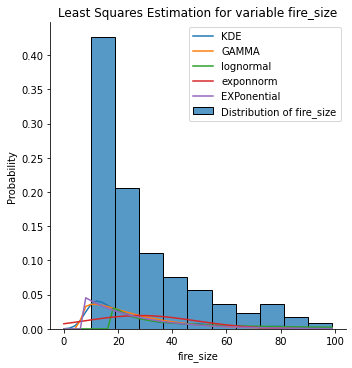

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9156207461035084, pvalue=4.1041778381798556e-54), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=12.811385744830107, pvalue=3.37676120398811e-09)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


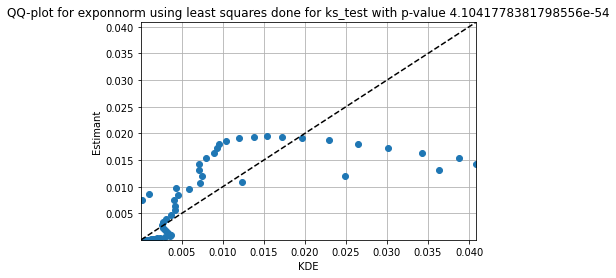

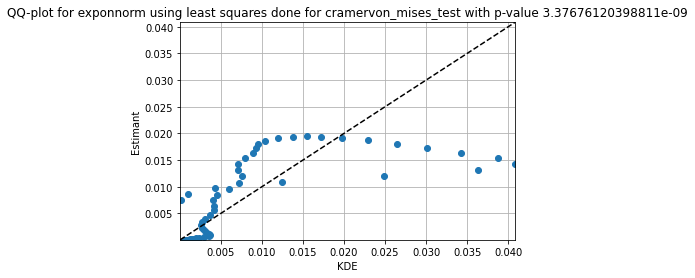

In [10]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 10)

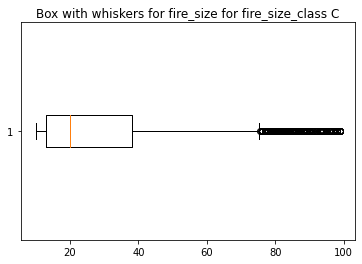

In [8]:
plt.boxplot(df_sampled[property], vert=False)
WHISKERS_FOLDER = './figures/whiskers/'
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()